In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Import rainfall & flow data into dataframes

In [2]:
flow60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 1)

In [3]:
%%time
rainfall60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 3)

CPU times: user 2min 11s, sys: 1.64 s, total: 2min 13s
Wall time: 2min 16s


In [4]:
#Replace missing values with NaN for flow and rainfall
rainfall60_filtered = rainfall60.replace('  ---',"NaN") #There are two spaces before the dashes in the rainfall data
flow60_filtered = flow60.replace(" ---","NaN")
rainfall60_filtered = rainfall60_filtered.replace(".", 0) #Replacing . to 0
rainfall60_filtered.head()

,Date,Time,Precipitation [mm],Quality,Interpolation,Valid,Invalid,Missing,Tags,Remarks
0,1979-07-26,09:00:00,0,40 (G),const since previous,0.0,0.0,0.0,NaN,NaN
1,1979-07-26,10:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,1979-07-26,11:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,1979-07-26,12:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,1979-07-26,13:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


In [5]:
#Print rainfall data with missing values - only 3 values missing
print(rainfall60['Date'][rainfall60['Quality']=='missing'].unique())

['1980-04-30T00:00:00.000000000' '1980-05-01T00:00:00.000000000'
 '2002-10-03T00:00:00.000000000']


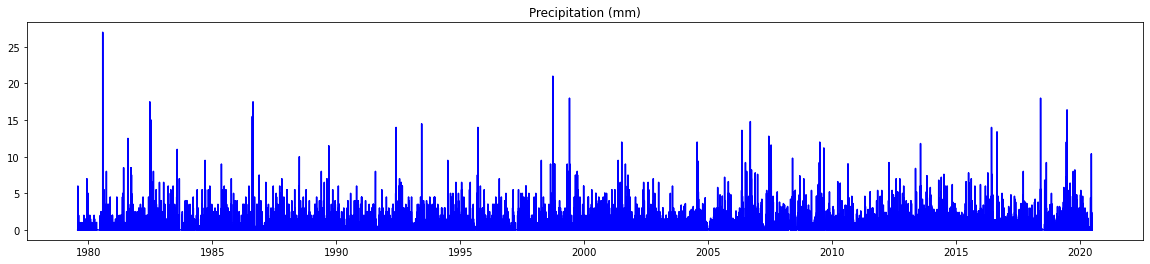

In [6]:
#Plot the rainfall time series for the 60 minute data
#print(rainfall60_filtered['Precipitation [mm]'])

plt.figure(figsize=(20,4))
plt.plot(rainfall60_filtered['Date'],rainfall60_filtered['Precipitation [mm]'], 'blue')
plt.title("Precipitation (mm)")

#rainfall60_filtered.plot(x='Date', y='Precipitation [mm]')
plt.show()

Importing 15 minute rainfall data

In [7]:
%%time
rainfall15 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 15 min.xlsx', 
                      sheet_name = 3)

CPU times: user 5min 17s, sys: 5.51 s, total: 5min 23s
Wall time: 5min 53s


In [8]:
rainfall15_filtered = rainfall15.replace("  ---","NaN")   #Replacing missing values again
rainfall15_filtered = rainfall15_filtered.replace('.', 0)
rainfall15_filtered.head()

,Date,Time,Precipitation [mm],Quality,Interpolation,Valid,Invalid,Missing,Tags,Remarks
0,2000-06-30,00:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
1,2000-06-30,00:15:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,2000-06-30,00:30:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,2000-06-30,00:45:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,2000-06-30,01:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


In [9]:
#Print rainfall data with missing values - only 1 value missing
print(rainfall15['Date'][rainfall15['Quality']=='missing'].unique())

['2002-10-03T00:00:00.000000000']


Text(0.5, 1.0, 'Precipitation (mm)')

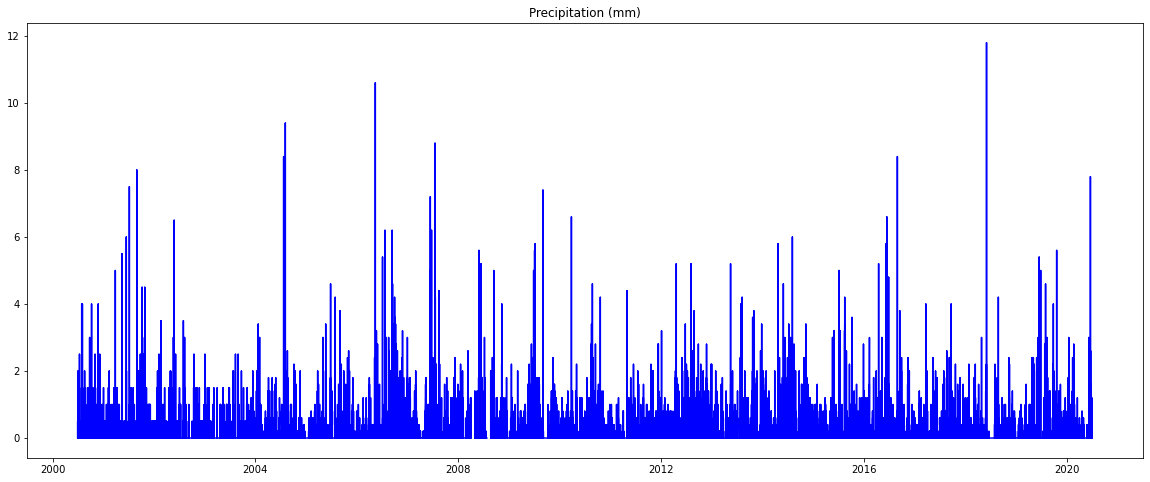

In [10]:
#Plot the rainfall time series for the 15 minute data 
plt.figure(figsize=(20,8))
plt.plot(rainfall15_filtered['Date'],rainfall15_filtered['Precipitation [mm]'], 'blue')
plt.yticks()
plt.title("Precipitation (mm)")

Look at relationship between flow and rainfall

In [11]:
#Try and compare 60 minute rainfall data to 60 minute flow data
df_flow_and_rainfall = pd.merge(rainfall60_filtered, flow60_filtered, on=['Date', 'Time']) #Merge the dataframes
df_flow_and_rainfall = df_flow_and_rainfall.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_rainfall', 
                                              'Quality_y':'Quality_flow', 
                                              'Flow [m³/s]':'flow',
                                              'Precipitation [mm]':'rainfall'})

df_flow_and_rainfall.head()

,Date,Time,rainfall,Quality_rainfall,Interpolation_x,Valid,Invalid,Missing,Tags_x,Remarks_x,flow,Quality_flow,Interpolation_y,Tags_y,Remarks_y
0,1986-01-08,14:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,5.73,200 (U),linear interpolation,NaN,NaN
1,1986-01-08,15:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,5.85,200 (U),linear interpolation,NaN,NaN
2,1986-01-08,16:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,5.97,200 (U),linear interpolation,NaN,NaN
3,1986-01-08,17:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,6.09,200 (U),linear interpolation,NaN,NaN
4,1986-01-08,18:00:00,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN,6.18,200 (U),linear interpolation,NaN,NaN


In [12]:
print(df_flow_and_rainfall['Date'][df_flow_and_rainfall['Quality_rainfall']=='missing'].unique())

['2002-10-03T00:00:00.000000000']


In [13]:
print(df_flow_and_rainfall['Date'][df_flow_and_rainfall['Quality_flow']=='missing'].unique())

['1987-02-11T00:00:00.000000000' '1987-02-12T00:00:00.000000000'
 '1987-02-13T00:00:00.000000000' '1987-02-14T00:00:00.000000000'
 '1987-02-15T00:00:00.000000000' '1987-02-16T00:00:00.000000000'
 '1987-02-17T00:00:00.000000000' '1987-02-18T00:00:00.000000000'
 '1987-03-25T00:00:00.000000000' '1987-03-26T00:00:00.000000000'
 '1987-03-27T00:00:00.000000000' '1987-03-28T00:00:00.000000000'
 '1987-03-29T00:00:00.000000000' '1987-03-30T00:00:00.000000000'
 '1987-03-31T00:00:00.000000000' '1987-04-01T00:00:00.000000000']


In [147]:
#Get rid of any input pairs to the regression with missing values -not sure quite understand this
df_flow_and_rainfall_complete = df_flow_and_rainfall[df_flow_and_rainfall['Quality_flow'] != 'missing']  
df_flow_and_rainfall_complete = df_flow_and_rainfall_complete[df_flow_and_rainfall_complete['Quality_flow'] != 'missing']

#Remove 0 values of precipitation
#df_flow_and_rainfall_complete.drop(df_flow_and_rainfall_complete.index[df_flow_and_rainfall_complete['rainfall'] == '0'], inplace = True)
#Remove 0 values of flow
#df_flow_and_rainfall_complete.drop(df_flow_and_rainfall_complete.index[df_flow_and_rainfall_complete['flow'] == '0'], inplace = True)

<AxesSubplot:xlabel='rainfall', ylabel='flow'>

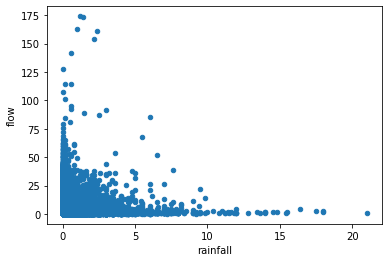

In [148]:
#Plot rainfall and flow against eachother 
df_flow_and_rainfall_complete.plot.scatter(x='rainfall', y='flow')
#plt.xlim(left=0)


Look at monthly means of flow and rainfall data 

In [164]:
#Try taking monthly means of flow data to simplify plot and look at correlation

flow60_filtered_dt=flow60_filtered.set_index(pd.to_datetime(flow60_filtered['Date']))
flow60_filtered_dt.head()

flow60_flowonly = flow60_filtered_dt.loc[:,['Flow [m³/s]']]
flow60_flowonly.head()

flow60_flowonly['Flow [m³/s]'] = flow60_flowonly['Flow [m³/s]'].astype(float)
flow60_flowonly.dtypes

monthly_mean_flow = flow60_flowonly.resample('M').mean()    #Not sure why this doesn't work

In [165]:
#Try taking monthly means of rainfall data to simplify plot and look at correlation

rainfall60_filtered_dt=rainfall60_filtered.set_index(pd.to_datetime(rainfall60_filtered['Date']))
rainfall60_filtered_dt.head()

rainfall60_rain = rainfall60_filtered_dt.loc[:,['Precipitation [mm]']]
rainfall60_rain.head()

rainfall60_rain['Precipitation [mm]'] = rainfall60_rain['Precipitation [mm]'].astype(float)
monthly_mean_rainfall = rainfall60_rain.resample('M').mean()

Text(0.5, 1.0, 'Monthly Averages of Rainfall and Flow')

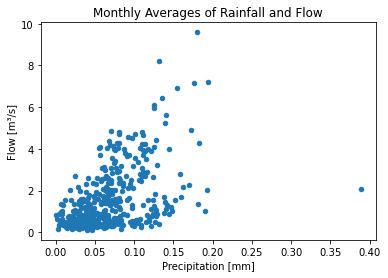

In [182]:
flow_and_rainfall_monthly = pd.merge(monthly_mean_rainfall, monthly_mean_flow, on=['Date']) #Merge the dataframes
flow_and_rainfall_monthly.head()


flow_and_rainfall_monthly.plot.scatter(x='Precipitation [mm]', y='Flow [m³/s]')
plt.title('Monthly Averages of Rainfall and Flow')
#plt.xlim(right=0.25)

Look at rainfall vs. stage

In [16]:
#Try the rainfall against the stage 
#import stage data

stage60 = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 2)

In [25]:
stage60_filtered = stage60.replace(" ---","NaN")


0        1973-07-23
1        1973-07-23
2        1973-07-23
3        1973-07-23
4        1973-07-23
            ...    
411464   2020-06-30
411465   2020-06-30
411466   2020-06-30
411467   2020-06-30
411468   2020-06-30
Name: Date, Length: 411469, dtype: datetime64[ns]

In [29]:
df_rainfall_and_stage = pd.merge(stage60_filtered, rainfall60_filtered, on=['Date', 'Time']) #Merge the dataframes

df_rainfall_and_stage = df_rainfall_and_stage.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_stage', 
                                              'Quality_y':'Quality_rainfall', 
                                              'Precipitation [mm]':'rainfall',
                                              'Stage [m]':'stage'})

df_rainfall_and_stage.head()

,Date,Time,stage,Quality_stage,Interpolation_x,Tags_x,Remarks_x,rainfall,Quality_rainfall,Interpolation_y,Valid,Invalid,Missing,Tags_y,Remarks_y
0,1979-07-26,09:00:00,0.274,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,40 (G),const since previous,0.0,0.0,0.0,NaN,NaN
1,1979-07-26,10:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
2,1979-07-26,11:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
3,1979-07-26,12:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN
4,1979-07-26,13:00:00,0.275,200 (U),linear interpolation,NaN,Digitised by CDS - Batch: Nov 2002,0,200 (U),const since previous,0.0,0.0,0.0,NaN,NaN


In [27]:
#Get rid of any input pairs to the regression with missing values
df_rainfall_and_stage_complete = df_rainfall_and_stage[df_rainfall_and_stage['Quality_stage'] != 'missing']  
df_rainfall_and_stage_complete = df_rainfall_and_stage_complete[df_rainfall_and_stage_complete['Quality_stage'] != 'missing'] 

<AxesSubplot:xlabel='rainfall', ylabel='stage'>

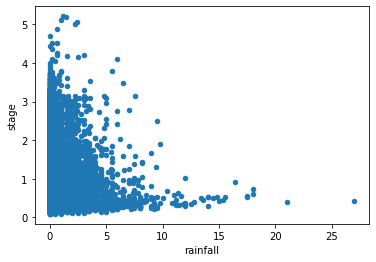

In [28]:
df_rainfall_and_stage_complete.plot.scatter(x='rainfall', y='stage')

In [30]:
#Look at precipitation data from Chipping Camden
rainfall60_CC = pd.read_excel('EA_files_subsample/Shipston Wiski data - 60 min.xlsx', 
                      sheet_name = 4)

In [32]:
rainfall60_CC_filtered = rainfall60_CC.replace('  ---',"NaN")
rainfall60_CC_filtered = rainfall60_CC_filtered.replace(".", 0) #Replacing . to 0
rainfall60_CC_filtered.head()

,Date,Time,Precipitation [mm],Quality,Interpolation,Valid,Invalid,Missing,Tags,Remarks
0,1981-03-16,15:00:00,0,40 (G),const since previous,0,0,0,NaN,NaN
1,1981-03-16,16:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN
2,1981-03-16,17:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN
3,1981-03-16,18:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN
4,1981-03-16,19:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN


In [33]:
print(rainfall60_CC['Date'][rainfall60_CC['Quality']=='missing'].unique())

['1983-04-11T00:00:00.000000000' '1983-04-12T00:00:00.000000000'
 '1983-04-13T00:00:00.000000000' '1983-04-14T00:00:00.000000000'
 '1991-10-31T00:00:00.000000000' '2008-06-10T00:00:00.000000000']


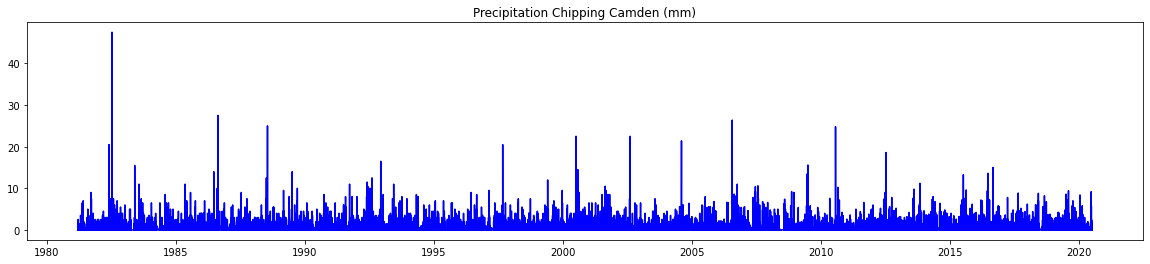

In [34]:
plt.figure(figsize=(20,4))
plt.plot(rainfall60_CC_filtered['Date'],rainfall60_CC_filtered['Precipitation [mm]'], 'blue')
plt.title("Precipitation Chipping Camden (mm)")
plt.show()

In [44]:
#Try and compare 60 minute rainfall Chipping Camden data to 60 minute flow data
df_flow_and_rainfallCC = pd.merge(rainfall60_CC_filtered, flow60_filtered, on=['Date', 'Time']) #Merge the dataframes
df_flow_and_rainfallCC = df_flow_and_rainfallCC.rename(columns= #Renaming columns for ease of use
                                             {'Quality_x':'Quality_rainfall', 
                                              'Quality_y':'Quality_flow', 
                                              'Flow [m³/s]':'flow',
                                              'Precipitation [mm]':'rainfall'})

df_flow_and_rainfallCC.head()

,Date,Time,rainfall,Quality_rainfall,Interpolation_x,Valid,Invalid,Missing,Tags_x,Remarks_x,flow,Quality_flow,Interpolation_y,Tags_y,Remarks_y
0,1986-01-08,14:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN,5.73,200 (U),linear interpolation,NaN,NaN
1,1986-01-08,15:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN,5.85,200 (U),linear interpolation,NaN,NaN
2,1986-01-08,16:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN,5.97,200 (U),linear interpolation,NaN,NaN
3,1986-01-08,17:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN,6.09,200 (U),linear interpolation,NaN,NaN
4,1986-01-08,18:00:00,0,200 (U),const since previous,0,0,0,NaN,NaN,6.18,200 (U),linear interpolation,NaN,NaN


In [45]:
#Get rid of any input pairs to the regression with missing values -not sure quite understand this
df_flow_and_rainfallCC_complete = df_flow_and_rainfallCC[df_flow_and_rainfallCC['Quality_flow'] != 'missing']  
df_flow_and_rainfallCC_complete = df_flow_and_rainfallCC_complete[df_flow_and_rainfallCC_complete['Quality_flow'] != 'missing']

<AxesSubplot:xlabel='rainfall', ylabel='flow'>

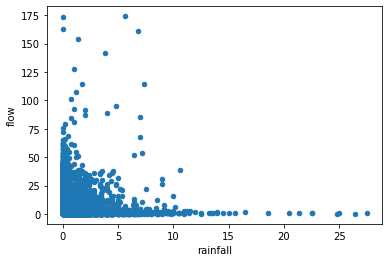

In [46]:
#Plot rainfall and flow against eachother 
df_flow_and_rainfallCC_complete.plot.scatter(x='rainfall', y='flow')